In [2]:
from math import factorial
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

#### 1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

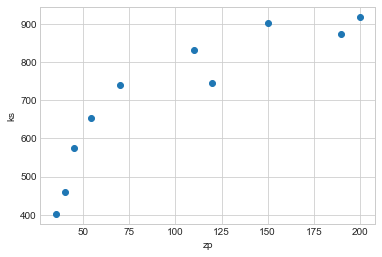

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp,ks)
plt.ylabel('ks')
plt.xlabel('zp')
plt.show()

In [4]:
b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
b

2.620538882402765

In [5]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

In [6]:
ks_heat = a + b * zp
ks_heat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

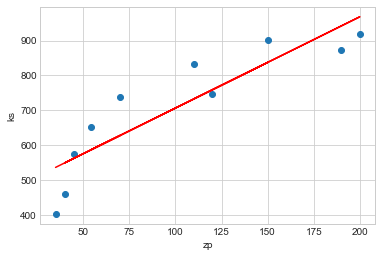

In [7]:
plt.scatter(zp,ks)
plt.plot(zp, ks_heat, color='r')
plt.xlabel('zp')
plt.ylabel('ks')
plt.show()

In [8]:
mse = np.sum((ks - ks_heat) ** 2 )/10
mse

6470.414201176658

#### Без интерсепта

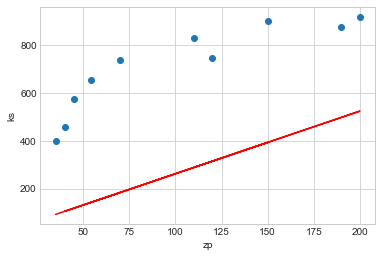

203763.93896082853

In [9]:
ks_heat = b * zp

plt.scatter(zp,ks)
plt.plot(zp, ks_heat, color='r')
plt.xlabel('zp')
plt.ylabel('ks')
plt.show()

mse1 = np.sum((ks - ks_heat) ** 2 )/10
mse1

#### С интерсептом

In [10]:
X = zp.reshape((10,1))
y = ks.reshape((10,1))
X = np.hstack([np.ones((10,1)),X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [11]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)),X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

### 2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [12]:
def mse_(B1, y=ks, X=zp, n=10):
    return np.sum((B1*X - y)**2)/n

In [13]:
alpha = 1e-6
B1 = 0.1
n = 10
for i in range(1001):
    B1 -= alpha*(2/n) * np.sum((B1 * zp-ks) * zp)
    if i%100 == 0:
        print(f'Iteration: {i}, B1={B1}, mse={mse_(B1)}')

Iteration: 0, B1=0.25952808, mse=493237.7212546963
Iteration: 100, B1=5.54537842245223, mse=58151.31823171113
Iteration: 200, B1=5.868748638669329, mse=56522.97550129376
Iteration: 300, B1=5.888531320728348, mse=56516.88130936019
Iteration: 400, B1=5.8897415574471985, mse=56516.85850140053
Iteration: 500, B1=5.889815595583751, mse=56516.858416040064
Iteration: 600, B1=5.889820124983314, mse=56516.85841572062
Iteration: 700, B1=5.889820402076462, mse=56516.85841571941
Iteration: 800, B1=5.88982041902807, mse=56516.8584157194
Iteration: 900, B1=5.889820420065112, mse=56516.85841571941
Iteration: 1000, B1=5.8898204201285544, mse=56516.85841571941


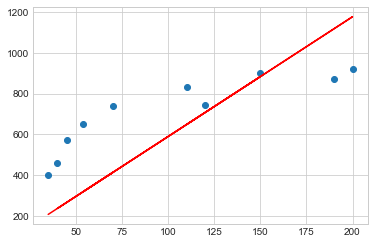

In [14]:
ks_1 = B1 * zp

plt.scatter(zp, ks)
plt.plot(zp, ks_1, color='r')
plt.show()

### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

#### Лаплас: случайная величина распределена нормально, дисперсия генеральной совокупности известна.
#### Таблица  Стьюдента: неизвестна дисперсия генеральной совокупности

### *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [15]:
def mse_1(a, b, y=ks, X=zp, n=10):
    return np.sum((a+b*X - y) ** 2) / n

In [16]:
alpha = 1e-6
a = 100
b = 0.5
n = 10
for i in range(10000001):
    a -= alpha*(2/n) * np.sum(a+b*zp - ks)
    b -= alpha*(2/n) * np.sum((a+b*zp - ks) * zp)
    if i%1000000 == 0:
        print(f'Iteration: {i}, a={a}, b={b}, mse={mse_1(a,b)}')
        

Iteration: 0, a=100.0011184, b=0.62822657318848, mse=318672.5607131538
Iteration: 1000000, a=236.962991074538, b=4.1457274590440525, mse=17362.22575838559
Iteration: 2000000, a=319.41003013308864, b=3.538881107481748, mse=10419.186925454842
Iteration: 3000000, a=369.0528077278013, b=3.1734885014067578, mse=7902.0223359762285
Iteration: 4000000, a=398.9435763407127, b=2.953479340553125, mse=6989.436691132287
Iteration: 5000000, a=416.9413212606913, b=2.821008047881454, mse=6658.583252841083
Iteration: 6000000, a=427.77807244634556, b=2.741244808414084, mse=6538.633965617361
Iteration: 7000000, a=434.30306637095964, b=2.693217992626239, mse=6495.146941333282
Iteration: 8000000, a=438.231877228258, b=2.66430022235875, mse=6479.380934507857
Iteration: 9000000, a=440.59748169176567, b=2.64688833644615, mse=6473.665046255852
Iteration: 10000000, a=442.021852749852, b=2.6364043410262927, mse=6471.592779075487


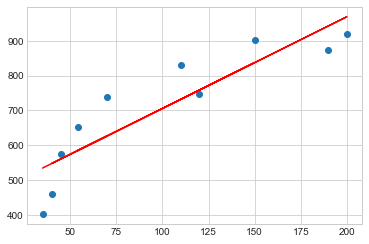

In [17]:
ks_2 = a + b * zp
ks_2

plt.scatter(zp, ks)
plt.plot(zp, ks_2, color='r')
plt.show()